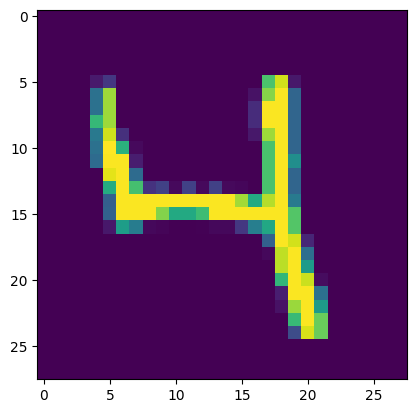

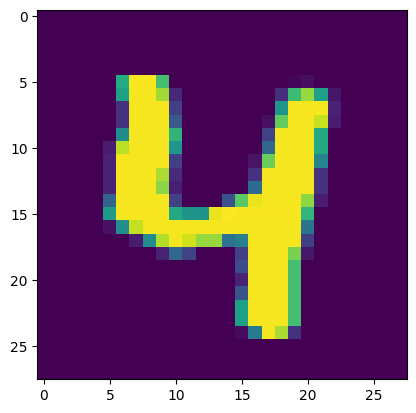

Epoch 1/3
1875/1875 [==============================] - 157s 82ms/step - loss: 0.2272 - accuracy: 0.9493 - val_loss: 0.0894 - val_accuracy: 0.9731
Epoch 2/3
1875/1875 [==============================] - 142s 76ms/step - loss: 0.0679 - accuracy: 0.9802 - val_loss: 0.1024 - val_accuracy: 0.9719
Epoch 3/3
313/313 [==============================] - 12s 37ms/step
0.9783


In [2]:
import tensorflow as tf
from keras.datasets import mnist
from keras.layers import Conv2D, Flatten, Dense
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as plt
from keras.models import Sequential
from sklearn.metrics import accuracy_score
nc = 10 # Number of classes

#MNIST dataset will be used that is packaged as part of the TensorFlow installation.
#This MNIST dataset is a set of 28×28 pixel grayscale images which represent
#hand-written digits.  It has 60,000 training rows, 10,000 testing rows,
#and 5,000 validation rows. It is a very common, basic, image classification
#dataset that is used in machine learning.
(Xtrain, ytrain), (Xtest, ytest) = mnist.load_data()
#Show sample images
plt.figure(1)
imgplot1 = plt.imshow(Xtrain[nr.randint(60000)])
plt.show()

plt.figure(2)
imgplot2 = plt.imshow(Xtest[nr.randint(10000)])
plt.show()

Xtrain = Xtrain.reshape(60000,28,28,1)
Xtest = Xtest.reshape(10000,28,28,1)
ytrainEnc = tf.one_hot(ytrain, depth=nc)
ytestEnc = tf.one_hot(ytest, depth=nc)

model=Sequential()
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(Xtrain, ytrainEnc,validation_data=(Xtest,ytestEnc), epochs=3)
ypred=model.predict(Xtest)
ypred=np.argmax(ypred,axis=1)
score=accuracy_score(ypred,ytest)
print(score)